In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn as skl
import matplotlib.pyplot as plt

# 1. Загрузка данных

In [ ]:
dataset_file_path = '/content/Laptop_price.csv'

In [ ]:
dataset = pd.read_csv(dataset_file_path)
print('Dimensions of the dataset:', dataset.shape)
dataset

Dimensions of the dataset: (1000, 7)


,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
...,...,...,...,...,...,...,...
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459


# 2. Изучение данных

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [ ]:
# Проверим датасет на наличие пустых данных.
dataset.isna().sum()
# Пропусков нет.
# Идем дальше!

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [ ]:
# Посмотрим основные статистики признаков датасета для выявляения выбросов!
dataset.describe()
# Вроде как никаких аномальных значений в основных статистиках не видно.
# Идем дальше!

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


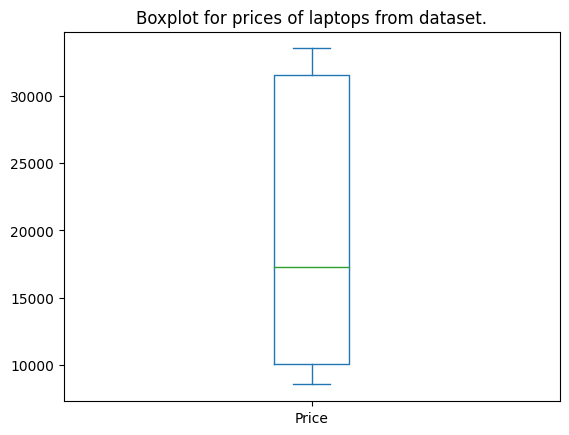

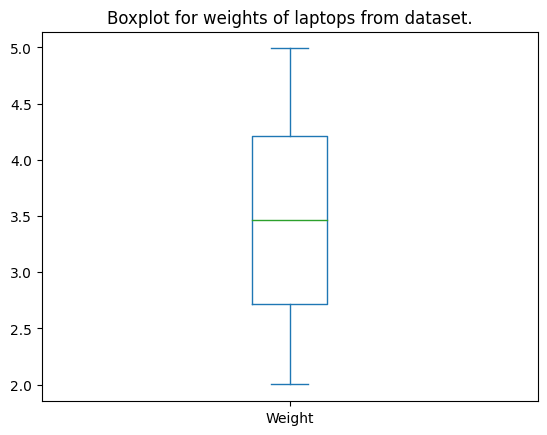

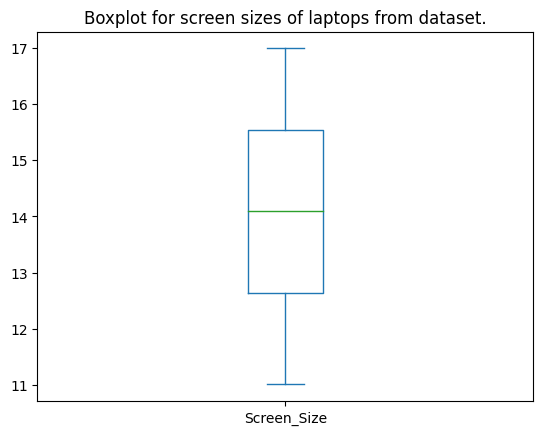

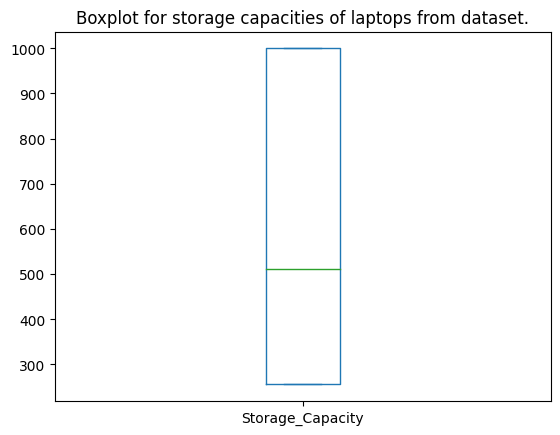

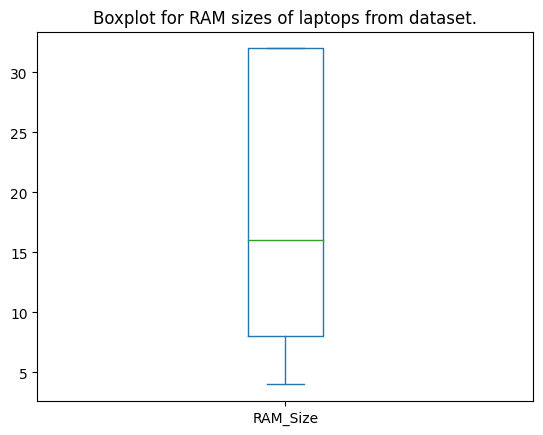

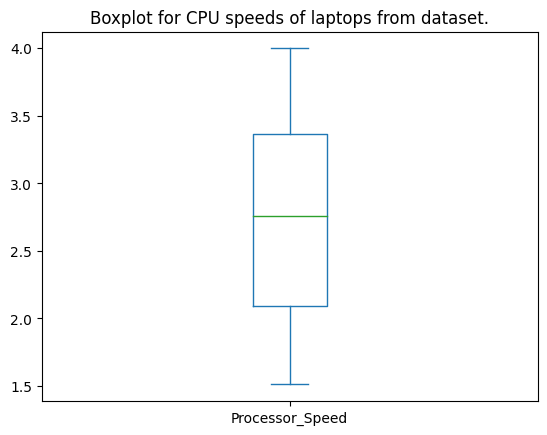

In [ ]:
# Посмотрим на данные визуально,
# возможно это поможет нам определить потенциальные выбросы.
dataset['Price'].plot(kind='box')
plt.title('Boxplot for prices of laptops from dataset.')
plt.show()

dataset['Weight'].plot(kind='box')
plt.title('Boxplot for weights of laptops from dataset.')
plt.show()

dataset['Screen_Size'].plot(kind='box')
plt.title('Boxplot for screen sizes of laptops from dataset.')
plt.show()

dataset['Storage_Capacity'].plot(kind='box')
plt.title('Boxplot for storage capacities of laptops from dataset.')
plt.show()

dataset['RAM_Size'].plot(kind='box')
plt.title('Boxplot for RAM sizes of laptops from dataset.')
plt.show()

dataset['Processor_Speed'].plot(kind='box')
plt.title('Boxplot for CPU speeds of laptops from dataset.')
plt.show()
# Никакие данные не выходят за "усы" боксплотов, так что и тут все хорошо.
# Идем дальше!

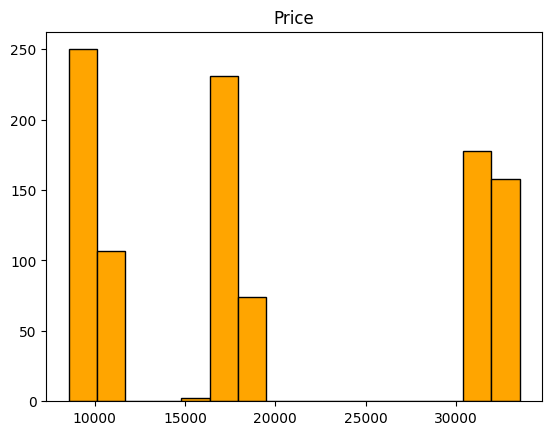

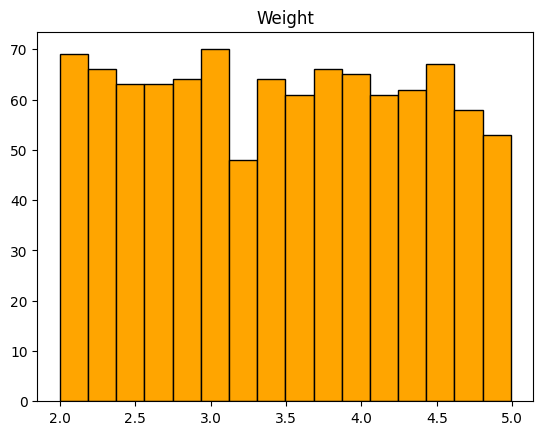

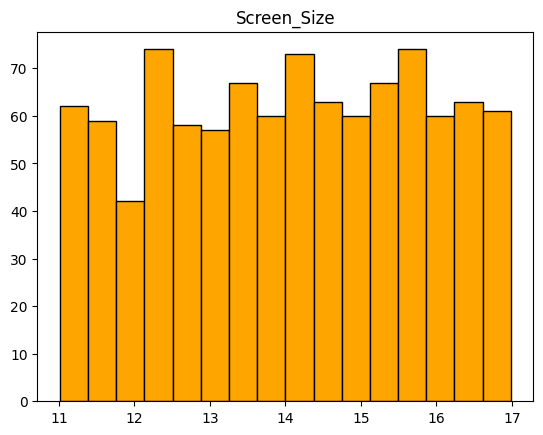

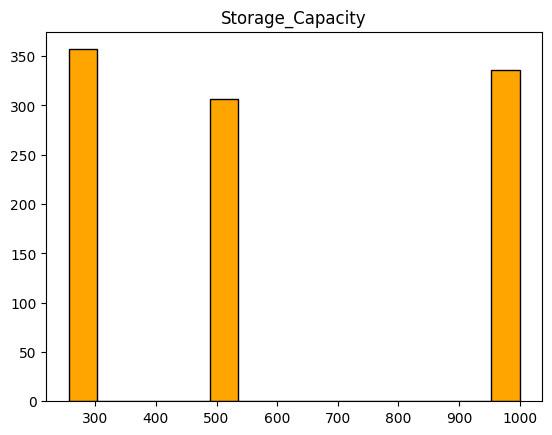

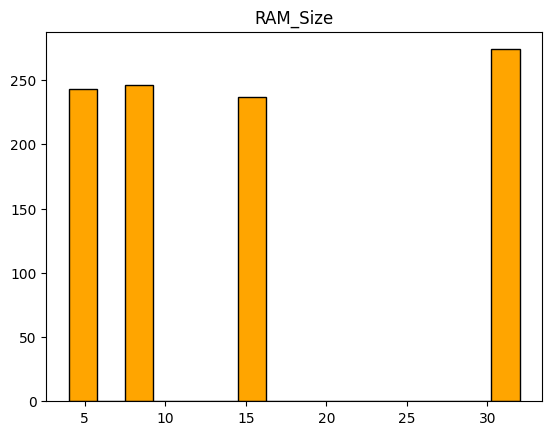

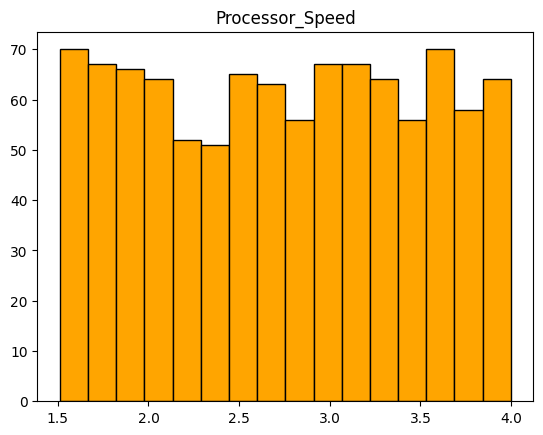

In [ ]:
# Проверим распределение данных признаков. Возможно оно близко к нормальному.
# Если это так, сможем применить z-score для выявления выбросов.
plt.hist(dataset['Price'], bins=16, color='orange', edgecolor='black')
plt.title('Price')
plt.show()

plt.hist(dataset['Weight'], bins=16, color='orange', edgecolor='black')
plt.title('Weight')
plt.show()

plt.hist(dataset['Screen_Size'], bins=16, color='orange', edgecolor='black')
plt.title('Screen_Size')
plt.show()

plt.hist(dataset['Storage_Capacity'], bins=16, color='orange', edgecolor='black')
plt.title('Storage_Capacity')
plt.show()

plt.hist(dataset['RAM_Size'], bins=16, color='orange', edgecolor='black')
plt.title('RAM_Size')
plt.show()

plt.hist(dataset['Processor_Speed'], bins=16, color='orange', edgecolor='black')
plt.title('Processor_Speed')
plt.show()
# Посмотрев на графики распределений, я сделал вывод, что z-score не очень
# подойдет для этих данных, однако, для некоторых из признаков можно будет
# сделать дискретизацию, т.к. разброс их значений не так уж и велик.

# 3. Удаление сильно зависимых признаков.

<ipython-input-86-e5065a535a12>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


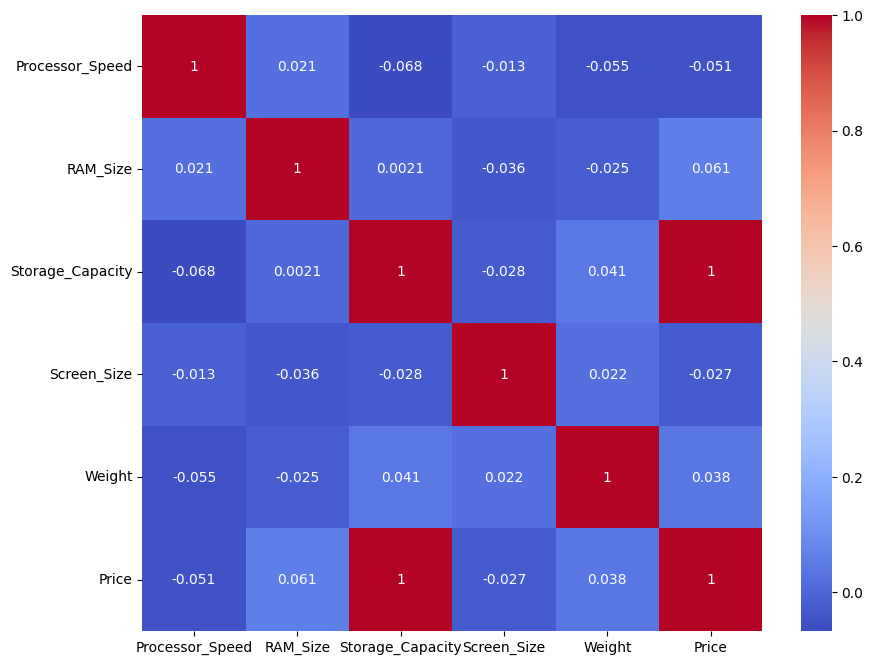

In [ ]:
# Для удаления сильно зависимых признаков посмотрим на хитмапу.
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
# Как мы можем заметить, признак размера хранилища очень сильно коррелирует с
# нашей целевой переменной - ценой. Поэтому его мы обязательно оставим.
# Других сильно коррелирующих признаков у нас нет, поэтому оставляем все, как есть.

# 4. Кодирование категориальных признаков, дискретизация и масштабирование числовых признаков.

In [ ]:
# Закодируем наш бренд, чтобы он был представлен категориальным типом данных.
dataset['Brand'] = dataset['Brand'].astype('category').cat.codes
print(dataset.dtypes)
dataset
# Теперь у нас нет типов данных object среди наших признаков.

Brand                  int8
Processor_Speed     float64
RAM_Size              int64
Storage_Capacity      int64
Screen_Size         float64
Weight              float64
Price               float64
dtype: object


,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,1,3.830296,16,512,11.185147,2.641094,17395.093065
1,0,2.912833,4,1000,11.311372,3.260012,31607.605919
2,4,3.241627,4,256,11.853023,2.029061,9291.023542
3,0,3.806248,16,512,12.280360,4.573865,17436.728334
4,0,3.268097,32,1000,14.990877,4.193472,32917.990718
...,...,...,...,...,...,...,...
995,3,3.343584,4,1000,12.587095,3.162399,31593.668017
996,2,2.780555,8,256,12.679356,3.750265,9149.521832
997,2,3.200569,4,512,12.666315,3.392612,16552.404779
998,1,1.604182,8,256,11.215581,3.857613,9407.473459


In [ ]:
# Теперь давайте разобьем на бины наш целевой параметр — цену.
# Цена очень хорошо бьётся на 3 бина.
cut_labels = ['Low budget', 'Medium budget', 'High budget']
cut_bins = [0, 12500, 25000, np.Inf]
dataset['Price'] = pd.cut(dataset['Price'],
                       bins=cut_bins,
                       labels=cut_labels)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Brand             1000 non-null   int8    
 1   Processor_Speed   1000 non-null   float64 
 2   RAM_Size          1000 non-null   int64   
 3   Storage_Capacity  1000 non-null   int64   
 4   Screen_Size       1000 non-null   float64 
 5   Weight            1000 non-null   float64 
 6   Price             1000 non-null   category
dtypes: category(1), float64(3), int64(2), int8(1)
memory usage: 41.3 KB


In [ ]:
# Давайте теперь отмасштабируем наши признаки, представленные в виде чисел с
# плавающей точкой.
# Я решил выбрать MinMaxScaler, потому что StandardScaler обычно используется
# для данных, распределенных нормально. Из анализа нашего датасета понятно, что
# в нашем случае данные не распределены нормально.
# Реализуем свой MinMaxScaler.

def min_max_scaler_fit(data):
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)
    return min_vals, max_vals

def min_max_scaler_transform(data, min_vals, max_vals):
    scaled_data = (data - min_vals) / (max_vals - min_vals)
    return scaled_data

def min_max_scaler_fit_transform(data):
    min_vals, max_vals = min_max_scaler_fit(data)
    scaled_data = min_max_scaler_transform(data, min_vals, max_vals)
    return scaled_data

In [ ]:
dataset['Processor_Speed'] = min_max_scaler_fit_transform(dataset['Processor_Speed'])
dataset['Screen_Size'] = min_max_scaler_fit_transform(dataset['Screen_Size'])
dataset['Weight'] = min_max_scaler_fit_transform(dataset['Weight'])
dataset.head(10)
# Таким образом все признаки со значениями float теперь лежат в пределах [0..1].

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,1,0.932352,16,512,0.028967,0.214214,Medium budget
1,0,0.563441,4,1000,0.050097,0.421198,High budget
2,4,0.695649,4,256,0.140771,0.009532,Low budget
3,0,0.922682,16,512,0.212308,0.860589,Medium budget
4,0,0.706292,32,1000,0.666055,0.733374,High budget
5,3,0.148683,16,256,0.155993,0.949682,Low budget
6,4,0.574655,32,256,0.117372,0.783998,Low budget
7,4,0.605241,4,256,0.766068,0.314551,Low budget
8,4,0.421699,4,512,0.671991,0.248501,Medium budget
9,0,0.735651,32,512,0.435219,0.699823,Medium budget


# 5. Поиск Gain ratio.

In [ ]:
def entropy(column):
    if column.empty:
        return 0
    # Подсчет количества каждого уникального значения в столбце
    value_counts = column.value_counts()
    if len(value_counts) <= 1:
        return 0
    # Вероятности для каждого уникального значения
    probabilities = value_counts / len(column)
    if any(probabilities == 0):
        return 0
    # Вычисление энтропии
    entropy = -np.sum(probabilities * np.log2(probabilities))

    return entropy

def my_info_gain(df, feature_name, target_name):
    # Вычисление энтропии целевого признака
    total_entropy = entropy(df[target_name])
    # Вычисление взвешенной энтропии для данного признака
    weighted_entropy = 0
    for value in df[feature_name].unique():
        subset = df[df[feature_name] == value]
        subset_entropy = entropy(subset[target_name])
        weighted_entropy += (len(subset) / len(df)) * subset_entropy
    # Вычисление Information Gain
    information_gain = total_entropy - weighted_entropy

    return information_gain

def gain_ratio(df, feature_name, target_name):
    # Вычисление Information Gain для данного признака
    information_gain = my_info_gain(df, feature_name, target_name)
    # Вычисление Split Information для данного признака
    split_info = entropy(df[feature_name])
    # Вычисление Gain Ratio
    gain_ratio = information_gain / split_info if split_info != 0 else 0

    return gain_ratio

In [ ]:
for column in dataset.columns:
    print('Gain ratio of', column, ':', gain_ratio(dataset, column, 'Price'))
# Получили список Gain Ratio для всех признаков.
# Очевидно, что выберем признак Storage_Capacity, т.к. он напрямую
# коррелирует с целевой переменной и, его Gain Ratio равен 1.

Gain ratio of Brand : 0.0029052834177467376
Gain ratio of Processor_Speed : 0.15876532279115438
Gain ratio of RAM_Size : 0.002286277990140335
Gain ratio of Storage_Capacity : 1.0
Gain ratio of Screen_Size : 0.15876532279115438
Gain ratio of Weight : 0.15876532279115438
Gain ratio of Price : 1.0
